In [74]:
from PIL import Image, ImageDraw
from IPython.display import display


def crop_circle(image, radius, center):
    """
    裁剪灰度图像中的圆形区域。

    参数:
    image_path: 图像的路径。
    radius: 圆的半径。
    center: 圆的中心点坐标（x, y）。如果为None，则使用图像中心。
    """

    width, height = image.size

    # 创建遮罩
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius), fill=255)

    # 应用遮罩
    result = Image.new('L', (width, height))
    result.paste(image, (0, 0), mask)

    return result

def crop_rectangle(img, crop_rectangle):
    # 裁剪图像
    cropped_image = img.crop(crop_rectangle)
    return cropped_image

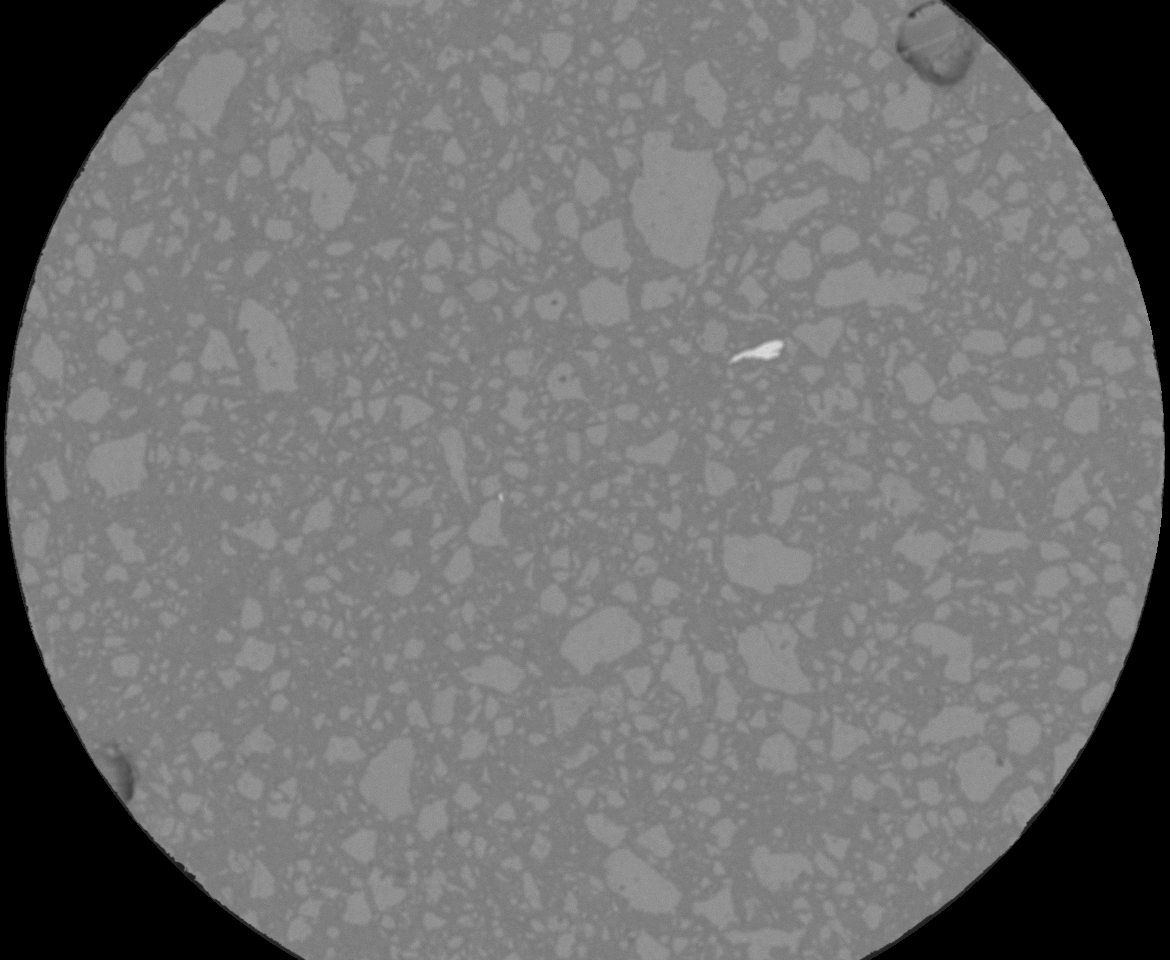

In [76]:

#config
path = "../datasets/sample4/bse/100"
# 加载图像（替换为您的图像路径）
image_path = f'{path}/4-1-1.bmp'  # 替换为您的图像路径
save_path = f'{path}/4-1-1-downsamp.bmp'  # 替换为您的图像路径

# 中心点偏移量
center_offset_x = 10
center_offset_y = -58
crop_radius = 580

# 矩形裁剪配置
# rect # (left, upper, right, lower)
rect_left = 66
rect_right = 1236
scale_bar_height = 64

# 计算好的缩小倍数
subsample_100 = 1.39139

# 打开图像
image = Image.open(image_path).convert('L')  # 确保图像是灰度的
# 调用函数
# 替换为你的图像路径和所需的圆形参数
# 使用示例
# 如果未指定中心，使用图像中心
width, height = image.size
center = ((width // 2) + center_offset_x , (height // 2) + center_offset_y)
result_image = crop_circle(image, radius=crop_radius, center=center)

# 再对底部区域进行裁剪
crop_rect = (rect_left, 0, rect_right, result_image.height - scale_bar_height)
result_image = crop_rectangle(result_image, crop_rect)

sample_times = subsample_100
# 进行下采样
# 新尺寸
new_size = (round(result_image.width / sample_times) , round(result_image.height / sample_times))
# 使用双三次插值下采样图像
resized_image = result_image.resize(new_size, Image.BICUBIC)

# 保存图像为BMP格式
resized_image.save(save_path, format='BMP')

display(result_image)
